This is a demo notebook for the baseline VQA text method of selecting the **most frequent answer** (in a training set) for the **question type** of the image/question pair to answer.

In [16]:
# Add the path of the main directory
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [17]:
from q_type_prior import qTypePrior
from evaluate import Evaluate

In [18]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
dataDir     = r"C:\Users\Nasser Benab\Documents\git\data\vqa"
versionType = "" 
taskType    = "OpenEnded" 
dataType    = "mscoco"
dataSubTypes = ["train2014"]

# Training 

In [20]:
# per Q-type prior method
qt_prior = qTypePrior(dataDir, versionType, taskType, dataType, dataSubTypes)

--> train2014
loading VQA annotations and questions into memory...
0:00:15.164000
creating index...
index created!


In [21]:
# Get the top answer per question type
qt_prior.get_top_answer_per_qtype()

# Predictions 

In [22]:
# Predict answers on the validation dataset
dataSubType = "val2014"
qt_prior.predict(dataSubType)

loading VQA annotations and questions into memory...
0:00:05.421000
creating index...
index created!
--> Saving the results


# Evaluation 

In [23]:
# Compute the accuracies for the validation set
eval_ = Evaluate(qt_prior.vqa_test, qt_prior.results_file, qt_prior.quesFile_test, qt_prior.dataDir, 
                 qt_prior.dataType, dataSubType)
eval_.compute_accuracies()

Loading and preparing results...     
DONE (t=0.76s)
creating index...
index created!
computing accuracy
Finshed Percent: [####################] 99% Done computing accuracy


Overall Accuracy: 35.13%


In [24]:
# Accuracy per answer type (%)
eval_.acc_answer_type_df

,Answer type,Accuracy
0,yes/no,71.33
1,number,31.93
2,other,8.86


In [25]:
# Accuracy per question type (%)
eval_.acc_question_type_df.head()

,Question type,Accuracy
0,could,89.91
1,is there a,88.23
2,are there,82.13
3,is there,80.95
4,do you,78.64


Ground truth answers:
---------------------
Question: Could someone call this Dihydrogen Oxide St?
Answer 1: yes
Answer 2: yes
Answer 3: yes
Answer 4: yes
Answer 5: yes
Answer 6: yes
Answer 7: yes
Answer 8: no
Answer 9: no
Answer 10: yes


Generated answer (accuracy 100.0%):
---------------------------------
Answer: yes


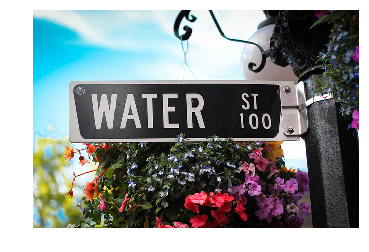

In [26]:
# Retrieve particular results
eval_.retrieve_result(question_type="could")